# Airbnb Singapore 

Airbnb is an online marketplace which lets people rent out their properties or spare rooms to guests.
Airbnb operates through a C2C online marketplace model that provides a platform for people looking to rent out their homes for a duration of time. Hosts provide details of their listing in terms of price, location, availability and amenities that Airbnb that fit guests required criteria.

__The main objective of this project is to provide user best price/rate per night to spent on airbnb listings.__ The dataset used in this project is provided by *insideairbnb.com*, sourced from publicly available information from the Airbnb site(airbnb.com). 

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {'font.family':'serif'})
plt.style.use("seaborn-darkgrid")
color = ['#fccbcb','#F99797', '#F76C6C', '#ABD0E6', '#23305E']
cmap = ListedColormap(color)
warnings.filterwarnings("ignore")
%matplotlib inline

**Features yang digunakan :** <br>
1. numeric : bedrooms, accommodates, host_is_superhost <br>
2. categories : area, property_type, room_type, amenities <br>
3. target : total_price

In [2]:
df = pd.read_csv('data-airbnbsg_cleaned.csv')

num = ['total_price', 'bedrooms', 'accommodates', 'host_is_superhost']
categories = ['property_type', 'room_type', 'area']

In [3]:
df = df.dropna(subset= ['bedrooms', 'accommodates','area', 'property_type', 'room_type', 'host_is_superhost', 'amenities'])

In [4]:
# Labelling categorical features
dum = df['amenities'].str.get_dummies(sep= ',').add_prefix('amenities_')
print(len(dum.columns.tolist()))
a = dum.columns.tolist()
dum = dum.drop(columns=a[-2:])

dfdum = pd.get_dummies(df[categories])

dfnew =  pd.concat([df[num], dfdum], axis=1)
dfnew = pd.concat([dfnew, dum], axis=1)
dfX = dfnew.drop(['total_price'], axis=1)
dfY = dfnew['total_price']

125


In [5]:
# Splitting train & test data
from sklearn.model_selection import train_test_split, KFold
xtrain, xtest, ytrain, ytest = train_test_split(
    dfX, dfY, 
    test_size= .1,
    random_state = 5
    )

## Gradient Boosting Regressor Model 

Skor GBR : 83.0 %
Skor GBR R2: 0.8327897280635393
RMSE GBR:  40.61153551260639


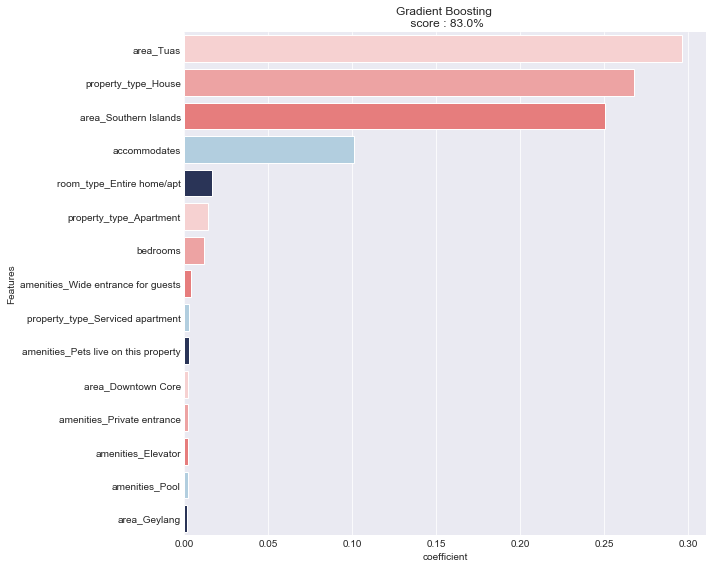

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
modelGB = GradientBoostingRegressor(max_depth=5, random_state= 5)
modelGB.fit(xtrain, ytrain)
df_GB = pd.DataFrame({'coefficient' : modelGB.feature_importances_, 'features' : xtrain.columns.values})
predGB = modelGB.predict(xtest)
skorGB = modelGB.score(xtest, ytest)
print('Skor GBR :', round(skorGB, 2)*100, '%')
print('Skor GBR R2:', r2_score(ytest, predGB))
print('RMSE GBR: ', mean_squared_error(ytest, predGB)** 0.5)
# print(df_GB.sort_values(by='coefficient', ascending=False))

fig = plt.figure(figsize=(10,8))
sns.barplot(
    x= 'coefficient',
    y= 'features',data= df_GB.sort_values(by='coefficient', ascending= False).head(15), palette=color)

plt.ylabel('Features')
plt.title('Gradient Boosting \n score : {}%'.format(round(skorGB, 2)*100))
plt.tight_layout()
plt.subplots_adjust(left= .26)
plt.show()